In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import fighters_cleanser
import constants

In [4]:
fights_0 = fighters_cleanser.load_cleanse_and_merge(constants.DEFAULT_FIGHTERS_FILE_NAME, constants.DEFAULT_FIGHTS_FILE_NAME)
fights_0 = fighters_cleanser.compute_prior_records(fights_0)
fights_0.shape

(4393, 142)

In [5]:
fights_0.head()

,r_fighter,b_fighter,r_kd,b_kd,r_sig_str,b_sig_str,r_sig_str_pct,b_sig_str_pct,r_total_str,b_total_str,...,age_diff,height_diff,weight_diff,reach_diff,r_prior_wins,r_prior_losses,r_prior_ties,b_prior_wins,b_prior_losses,b_prior_ties
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52,47,99 of 182,59 of 121,...,1.210959,-2,0,-3,8,2,0,4,1,0
1,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0,77,0 of 3,7 of 9,...,-1.175342,-2,0,1,5,0,0,2,1,0
2,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40,34,47 of 109,45 of 131,...,3.583562,-3,0,-1,8,3,0,0,1,0
3,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16,43,3 of 13,12 of 25,...,5.775342,-1,0,-1,11,2,0,3,1,0
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32,29,43 of 134,44 of 150,...,5.775342,-1,0,-1,8,2,0,0,0,0


In [6]:
#fights_0.columns

In [7]:
#fights = fights_0.copy()

In [8]:
#fights = fighters_cleanser.compute_prior_records(fights)

In [9]:
#fights.head()

In [10]:
#fights = fighters_cleanser.add_fictitious_records(fights)

In [11]:
#fights.head()

In [12]:
'''columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']
fights = fights[columns_to_use]
fights.head()'''

"columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']\nfights = fights[columns_to_use]\nfights.head()"

In [13]:
#fights.head()

In [14]:
#fights = fighters_cleanser.find_win_loss_tie_pct(fights)

In [15]:
#fights.head()

In [16]:
'''def recompute_records(fights_0, pretend_wins, pretend_losses, pretend_ties):
    fights = fights_0.copy()
    fights = fighters_cleanser.compute_prior_records(fights)
    fights = fighters_cleanser.add_fictitious_records(fights, pretend_wins, pretend_losses, pretend_ties)
    fights = fighters_cleanser.find_win_loss_tie_pct(fights)
    columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']
    fights = fights[columns_to_use]
    #fights['r_wldiff_pct'] = fights.r_win_pct - fights.r_loss_pct
    #fights['b_wldiff_pct'] = fights.b_win_pct - fights.b_loss_pct
    return fights
    '''

"def recompute_records(fights_0, pretend_wins, pretend_losses, pretend_ties):\n    fights = fights_0.copy()\n    fights = fighters_cleanser.compute_prior_records(fights)\n    fights = fighters_cleanser.add_fictitious_records(fights, pretend_wins, pretend_losses, pretend_ties)\n    fights = fighters_cleanser.find_win_loss_tie_pct(fights)\n    columns_to_use = ['r_fighter','b_fighter', 'date', 'loser', 'winner', 'r_prior_wins', 'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses', 'b_prior_ties', 'r_b_winner']\n    fights = fights[columns_to_use]\n    #fights['r_wldiff_pct'] = fights.r_win_pct - fights.r_loss_pct\n    #fights['b_wldiff_pct'] = fights.b_win_pct - fights.b_loss_pct\n    return fights\n    "

In [17]:
#fights2 = recompute_records(fights, 5, 5, 1)
#fights2.head()

In [18]:
def split_fights_df(fights):
    x_train, x_test, y_train, y_test = train_test_split(fights[['r_fighter', 'b_fighter', 'date', 'loser', 'winner', 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights',
       'r_win_pct', 'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct',
       'b_tie_pct', 'r_wldiff_pct', 'b_wldiff_pct']], fights['r_b_winner'], test_size=.33, random_state=87)
    x_train['guess'] = x_train.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)
    return x_train, x_test, y_train, y_test
    
    

In [19]:
#x_train, x_test, y_train, y_test = split_fights_df(fights)

In [20]:
#x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [21]:
#x_train.head()

In [22]:
#y_train.head()

In [23]:
#x_test.head()

In [24]:
#y_test.head()

In [25]:
'''def predict(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties):
    fights = recompute_records(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties)
    fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)
    print(accuracy_score(fights.r_b_winner, fights.guess))
    print(confusion_matrix(fights.r_b_winner, fights.guess))'''

"def predict(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties):\n    fights = recompute_records(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties)\n    fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)\n    print(accuracy_score(fights.r_b_winner, fights.guess))\n    print(confusion_matrix(fights.r_b_winner, fights.guess))"

In [26]:
#predict(fights_0, 0, 0, 0)

In [27]:
num_pretend_wins, num_pretend_losses, num_pretend_ties = (0, 0, 0)

In [28]:
fights = fighters_cleanser.recompute_records(fights_0, num_pretend_wins, num_pretend_losses, num_pretend_ties)
fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else 'b', axis=1)

In [29]:
accuracy_score(fights.r_b_winner, fights.guess)

0.4712041884816754

In [30]:
(fights.guess == fights.r_b_winner).sum() / fights.shape[0]

0.4712041884816754

In [31]:
cm = confusion_matrix(fights.r_b_winner, fights.guess)
cm

array([[   0,   46,   25],
       [   0, 1064,  487],
       [   0, 1765, 1006]], dtype=int64)

In [32]:
cm[0,2]

25

In [33]:
type(cm)

numpy.ndarray

In [34]:
fights.r_b_winner.value_counts() / fights.shape[0]

r       0.630776
b       0.353062
None    0.016162
Name: r_b_winner, dtype: float64

In [35]:
fights.guess.value_counts() / fights.shape[0]

b    0.65445
r    0.34555
Name: guess, dtype: float64

In [36]:
fights.r_b_winner.value_counts()

r       2771
b       1551
None      71
Name: r_b_winner, dtype: int64

In [37]:
fights.guess.value_counts()

b    2875
r    1518
Name: guess, dtype: int64

In [38]:
fights.guess.value_counts().sum() == fights.r_b_winner.value_counts().sum()

True

In [39]:
((fights.r_b_winner == 'r') & (fights.guess == 'r')).sum()

1006

In [40]:
((fights.r_b_winner == 'r') & (fights.guess == 'b')).sum()

1765

In [41]:
((fights.r_b_winner == 'b') & (fights.guess == 'r')).sum()

487

In [42]:
((fights.r_b_winner == 'b') & (fights.guess == 'b')).sum()

1064

In [43]:
((fights.r_b_winner == "None") & (fights.guess == 'r')).sum()

25

In [44]:
((fights.r_b_winner == "None") & (fights.guess == 'b')).sum()

46

In [45]:
(fights.r_b_winner == "None").sum()

71

In [46]:
(fights.r_wldiff_pct == fights.b_wldiff_pct).sum()

504

In [47]:
fights[fights.r_wldiff_pct == fights.b_wldiff_pct][[ 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights', 'r_win_pct',
       'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct', 'b_tie_pct',
       'r_wldiff_pct', 'b_wldiff_pct', 'r_b_winner', 'guess']]

,r_prior_wins,r_prior_losses,r_prior_ties,b_prior_wins,b_prior_losses,b_prior_ties,r_total_fights,b_total_fights,r_win_pct,r_loss_pct,r_tie_pct,b_win_pct,b_loss_pct,b_tie_pct,r_wldiff_pct,b_wldiff_pct,r_b_winner,guess
0,8,2,0,4,1,0,10,5,0.800000,0.200000,0.000000,0.800000,0.200000,0.0,0.600000,0.600000,r,b
8,4,1,0,4,1,0,5,5,0.800000,0.200000,0.000000,0.800000,0.200000,0.0,0.600000,0.600000,r,b
15,1,1,1,1,1,0,3,2,0.333333,0.333333,0.333333,0.500000,0.500000,0.0,0.000000,0.000000,b,b
17,4,2,0,6,3,0,6,9,0.666667,0.333333,0.000000,0.666667,0.333333,0.0,0.333333,0.333333,r,b
20,3,2,0,3,2,0,5,5,0.600000,0.400000,0.000000,0.600000,0.400000,0.0,0.200000,0.200000,b,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,1,2,0,1,2,0,3,3,0.333333,0.666667,0.000000,0.333333,0.666667,0.0,-0.333333,-0.333333,r,b
4379,0,2,0,0,1,0,2,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,-1.000000,-1.000000,r,b
4383,0,1,0,0,1,0,1,1,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,-1.000000,-1.000000,r,b
4388,2,2,0,1,1,0,4,2,0.500000,0.500000,0.000000,0.500000,0.500000,0.0,0.000000,0.000000,r,b


In [48]:
fights['guess'] = fights.apply(lambda row: 'r' if row.r_wldiff_pct > row.b_wldiff_pct else ('b' if row.r_wldiff_pct < row.b_wldiff_pct else np.random.choice(['r', 'b'])), axis=1)

In [49]:
fights['guess']

0       r
1       r
2       r
3       r
4       b
       ..
4388    b
4389    r
4390    r
4391    r
4392    r
Name: guess, Length: 4393, dtype: object

In [50]:
accuracy_score(fights.r_b_winner, fights.guess)

0.5406328249487822

In [51]:
confusion_matrix(fights.r_b_winner, fights.guess)

array([[   0,   33,   38],
       [   0,  792,  759],
       [   0, 1188, 1583]], dtype=int64)

In [52]:
def choose_r_or_b(row):
    if row.r_wldiff_pct > row.b_wldiff_pct:
        return 'r'
    elif row.r_wldiff_pct < row.b_wldiff_pct:
        return 'b'
    else:
        return np.random.choice(['r', 'b'])

In [53]:
fights['guess'] = fights.apply(choose_r_or_b, axis=1)

In [54]:
confusion_matrix(fights.r_b_winner, fights.guess)

array([[   0,   32,   39],
       [   0,  786,  765],
       [   0, 1221, 1550]], dtype=int64)

In [55]:
accuracy_score(fights.r_b_winner, fights.guess)

0.531755064875939

In [56]:
fights.guess.value_counts().sum()

4393

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='r_total_fights', ylabel='count'>

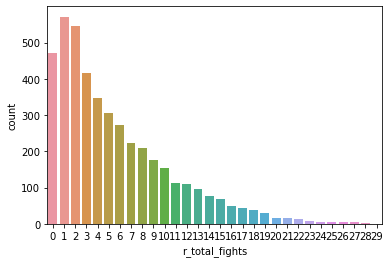

In [57]:
sns.countplot(fights.r_total_fights)

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='b_total_fights', ylabel='count'>

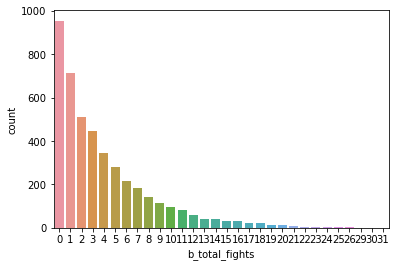

In [58]:
sns.countplot(fights.b_total_fights)

In [59]:
fights.columns

Index(['r_fighter', 'b_fighter', 'date', 'loser', 'winner', 'r_prior_wins',
       'r_prior_losses', 'r_prior_ties', 'b_prior_wins', 'b_prior_losses',
       'b_prior_ties', 'r_total_fights', 'b_total_fights', 'r_win_pct',
       'r_loss_pct', 'r_tie_pct', 'b_win_pct', 'b_loss_pct', 'b_tie_pct',
       'r_wldiff_pct', 'b_wldiff_pct', 'r_b_winner', 'guess'],
      dtype='object')

In [60]:
fights[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess']]

,r_total_fights,b_total_fights,r_b_winner,guess
0,10,5,r,r
1,5,3,b,r
2,11,1,b,r
3,13,4,b,r
4,10,0,r,r
...,...,...,...,...
4388,4,2,r,b
4389,0,1,r,r
4390,0,0,r,b
4391,1,1,r,b


In [61]:
def find_confusion_result_for_row(row):
    if row.r_b_winner == 'r' and row.guess == 'r':
        return 'TP'
    elif row.r_b_winner == 'r' and row.guess == 'b':
        return 'FP'
    elif row.r_b_winner == 'b' and row.guess == 'r':
        return 'FN'
    elif row.r_b_winner == 'b' and row.guess == 'b':
        return 'TN'
    else:
        return "I'm totally confused"

In [62]:
fights[['guess_result']] = fights.apply(find_confusion_result_for_row, axis=1)

In [63]:
fights[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result']]

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result
0,10,5,r,r,TP
1,5,3,b,r,FN
2,11,1,b,r,FN
3,13,4,b,r,FN
4,10,0,r,r,TP
...,...,...,...,...,...
4388,4,2,r,b,FP
4389,0,1,r,r,TP
4390,0,0,r,b,FP
4391,1,1,r,b,FP


In [64]:
fights[['accurate']] = fights.apply(lambda row: 1 if row.guess_result in ['TP', 'TN'] else 0, axis=1)
fights.head()

,r_fighter,b_fighter,date,loser,winner,r_prior_wins,r_prior_losses,r_prior_ties,b_prior_wins,b_prior_losses,...,r_tie_pct,b_win_pct,b_loss_pct,b_tie_pct,r_wldiff_pct,b_wldiff_pct,r_b_winner,guess,guess_result,accurate
0,Henry Cejudo,Marlon Moraes,2019-06-08,Marlon Moraes,Henry Cejudo,8,2,0,4,1,...,0.0,0.800000,0.200000,0.0,0.600000,0.600000,r,r,TP,1
1,Jimmie Rivera,Marlon Moraes,2018-06-01,Jimmie Rivera,Marlon Moraes,5,0,0,2,1,...,0.0,0.666667,0.333333,0.0,1.000000,0.333333,b,r,FN,0
2,John Dodson,Marlon Moraes,2017-11-11,John Dodson,Marlon Moraes,8,3,0,0,1,...,0.0,0.000000,1.000000,0.0,0.454545,-1.000000,b,r,FN,0
3,Raphael Assuncao,Marlon Moraes,2019-02-02,Raphael Assuncao,Marlon Moraes,11,2,0,3,1,...,0.0,0.750000,0.250000,0.0,0.692308,0.500000,b,r,FN,0
4,Raphael Assuncao,Marlon Moraes,2017-06-03,Marlon Moraes,Raphael Assuncao,8,2,0,0,0,...,0.0,NaN,NaN,NaN,0.600000,NaN,r,r,TP,1


In [65]:
fights[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result', 'accurate']]

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result,accurate
0,10,5,r,r,TP,1
1,5,3,b,r,FN,0
2,11,1,b,r,FN,0
3,13,4,b,r,FN,0
4,10,0,r,r,TP,1
...,...,...,...,...,...,...
4388,4,2,r,b,FP,0
4389,0,1,r,r,TP,1
4390,0,0,r,b,FP,0
4391,1,1,r,b,FP,0


In [66]:
fr = fights.sort_values('r_total_fights')
fr.head()[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result', 'accurate']]

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result,accurate
867,0,1,b,b,TN,1
3235,0,0,b,r,FN,0
4195,0,0,r,r,TP,1
3234,0,6,b,b,TN,1
3231,0,0,r,b,FP,0


In [67]:
fb = fights.sort_values('b_total_fights')
fb[['r_total_fights', 'b_total_fights', 'r_b_winner', 'guess', 'guess_result', 'accurate']].head()

,r_total_fights,b_total_fights,r_b_winner,guess,guess_result,accurate
2196,6,0,b,r,FN,0
2369,0,0,b,b,TN,1
2365,0,0,b,b,TN,1
2357,7,0,r,b,FP,0
2354,2,0,r,b,FP,0


In [68]:
#fights.groupby('r_total_fights').mean()['accurate']

In [69]:
#fights.groupby('r_total_fights').sum()['accurate'] / fights.groupby('r_total_fights').count()['r_fighter']

In [70]:
(fights.groupby('r_total_fights').sum()['accurate'] / fights.groupby('r_total_fights').count()['r_fighter'] != fights.groupby('r_total_fights').mean()['accurate']).sum() == 0

True

In [71]:
(fights.groupby('b_total_fights').sum()['accurate'] / fights.groupby('b_total_fights').count()['b_fighter'] != fights.groupby('b_total_fights').mean()['accurate']).sum() == 0

True

fights.groupby('b_total_fights').mean()['accurate'] is the same as fights.groupby('b_total_fights').sum()['accurate'] / fights.groupby('b_total_fights').count()['b_fighter']
mean() does take the mean of that group.
So use mean() instead of the sum and then dividing by the count.

In [72]:
fights.groupby('r_total_fights').count()['r_fighter']

r_total_fights
0     470
1     571
2     545
3     417
4     346
5     305
6     274
7     224
8     208
9     176
10    154
11    114
12    109
13     97
14     78
15     68
16     49
17     44
18     38
19     30
20     17
21     15
22     13
23      7
24      4
25      4
26      6
27      6
28      3
29      1
Name: r_fighter, dtype: int64

In [73]:
#fights.groupby('b_total_fights').sum()['accurate'] / fights.groupby('b_total_fights').count()['b_fighter']

In [74]:
fights.groupby('b_total_fights').count()['b_fighter']

b_total_fights
0     953
1     713
2     512
3     448
4     344
5     282
6     216
7     185
8     140
9     113
10     96
11     84
12     59
13     40
14     39
15     30
16     31
17     24
18     21
19     13
20     14
21     10
22      5
23      6
24      5
25      5
26      2
29      1
30      1
31      1
Name: b_fighter, dtype: int64

In [75]:
fights.groupby('b_total_fights').mean()['accurate']

b_total_fights
0     0.501574
1     0.493689
2     0.546875
3     0.517857
4     0.561047
5     0.578014
6     0.597222
7     0.545946
8     0.550000
9     0.566372
10    0.520833
11    0.476190
12    0.559322
13    0.575000
14    0.641026
15    0.533333
16    0.580645
17    0.625000
18    0.666667
19    0.538462
20    0.642857
21    0.700000
22    0.400000
23    0.500000
24    0.200000
25    0.400000
26    0.500000
29    0.000000
30    0.000000
31    1.000000
Name: accurate, dtype: float64

In [76]:
r_accuracy = fights.groupby('r_total_fights').mean()['accurate']
b_accuracy = fights.groupby('b_total_fights').mean()['accurate']

In [77]:
# sns.lineplot(r_accuracy, x='r_total_fights', y='index')

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='r_total_fights', ylabel='accurate'>

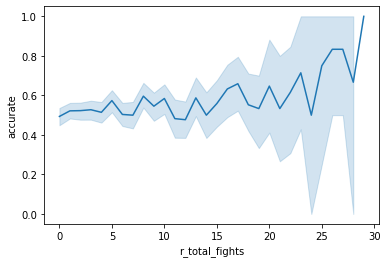

In [78]:
sns.lineplot(fights.r_total_fights, fights.accurate)

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='r_total_fights'>

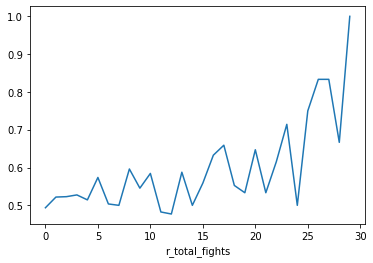

In [79]:
sns.lineplot(r_accuracy.index, r_accuracy.values)

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='b_total_fights', ylabel='accurate'>

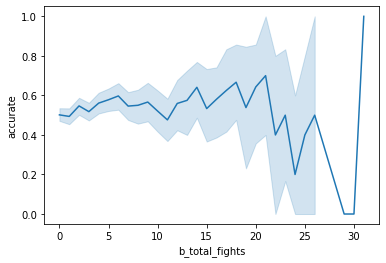

In [80]:
sns.lineplot(fights.b_total_fights, fights.accurate)

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='b_total_fights'>

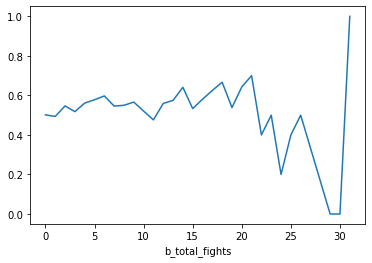

In [81]:
sns.lineplot(b_accuracy.index, b_accuracy.values)

It would seem that sns.lineplot(fights.r_total_fights, fights.accurate) and sns.lineplot(r_accuracy.index, r_accuracy.values) give me the same line, although the way the graph is done is slightly different.

C:\Users\paulj_1e1uzlz\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='date', ylabel='accurate'>

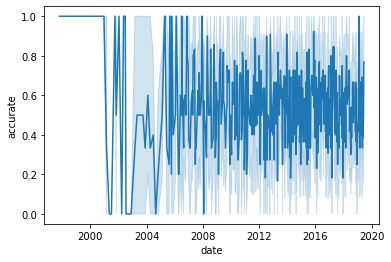

In [82]:
sns.lineplot(fights.date, fights.accurate)

The date does not seem to have much or any effect on the accuracy of this prediction.

In [83]:
f2 = fights[(fights.r_total_fights > 5) & (fights.b_total_fights > 5)]
f2.shape

(801, 25)

In [84]:
fighters_cleanser.predict(f2, 0, 0, 0)

prediction with 0, 0, 0
0.5430711610486891
[[  0   7   7]
 [  0 145 158]
 [  0 194 290]]


Let's try restricting the dataset to those who have a minimum number of fights in their record already.  For now, we won't do any "fictitious fights".

In [85]:
min_fights_num = 0
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 1
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 2
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 3
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 4
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 5
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 6
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 7
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 8
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 9
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 10
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 11
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 12
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 13
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 14
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 15
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 16
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 17
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 18
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 19
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 20
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)
min_fights_num = 21
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 0, 0, 0)

prediction with 0, 0, 0
0.5404242237934215
[[   0   20   31]
 [   0  600  590]
 [   0  854 1158]]
prediction with 0, 0, 0
0.551926298157454
[[  0  15  18]
 [  0 455 444]
 [  0 593 863]]
prediction with 0, 0, 0
0.5497762863534675
[[  0  11  18]
 [  0 340 334]
 [  0 442 643]]
prediction with 0, 0, 0
0.5592972181551976
[[  0   9  10]
 [  0 275 254]
 [  0 329 489]]
prediction with 0, 0, 0
0.5546139359698682
[[  0   7  10]
 [  0 207 198]
 [  0 258 382]]
prediction with 0, 0, 0
0.5568039950062422
[[  0   7   7]
 [  0 147 156]
 [  0 185 299]]
prediction with 0, 0, 0
0.5441412520064205
[[  0   6   8]
 [  0 110 125]
 [  0 145 229]]
prediction with 0, 0, 0
0.546236559139785
[[  0   4   6]
 [  0  79  99]
 [  0 102 175]]
prediction with 0, 0, 0
0.5415472779369628
[[  0   3   4]
 [  0  61  79]
 [  0  74 128]]
prediction with 0, 0, 0
0.532258064516129
[[ 0  2  4]
 [ 0 38 60]
 [ 0 50 94]]
prediction with 0, 0, 0
0.546583850931677
[[ 0  1  2]
 [ 0 28 38]
 [ 0 32 60]]
prediction with 0, 0, 0
0.6
[[ 0  

So the method of using the previous record and restricting to a minimum number of fights can get us better than 50% but at most about 60% and with an decreasing number of fights in which we actually can make predictions.

Let's try it with ficticious fights of 4 wins, 4 losses, and 0 ties.

In [86]:
min_fights_num = 0
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 1
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 2
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 3
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 4
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 5
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 6
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 7
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 8
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 9
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 10
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 11
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 12
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 13
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 14
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 15
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 16
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 17
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 18
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 19
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 20
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)
min_fights_num = 21
fighters_cleanser.predict(fights[(fights.r_total_fights > min_fights_num) & (fights.b_total_fights > min_fights_num)], 4, 4, 0)

prediction with 4, 4, 0
0.5505687058100215
[[   0   22   29]
 [   0  545  645]
 [   0  766 1246]]
prediction with 4, 4, 0
0.559463986599665
[[  0  15  18]
 [  0 427 472]
 [  0 547 909]]
prediction with 4, 4, 0
0.5536912751677853
[[  0  14  15]
 [  0 311 363]
 [  0 406 679]]
prediction with 4, 4, 0
0.5607613469985359
[[  0   9  10]
 [  0 248 281]
 [  0 300 518]]
prediction with 4, 4, 0
0.5527306967984934
[[  0   9   8]
 [  0 192 213]
 [  0 245 395]]
prediction with 4, 4, 0
0.550561797752809
[[  0   7   7]
 [  0 139 164]
 [  0 182 302]]
prediction with 4, 4, 0
0.5425361155698234
[[  0   7   7]
 [  0 105 130]
 [  0 141 233]]
prediction with 4, 4, 0
0.5612903225806452
[[  0   4   6]
 [  0  79  99]
 [  0  95 182]]
prediction with 4, 4, 0
0.5386819484240688
[[  0   3   4]
 [  0  58  82]
 [  0  72 130]]
prediction with 4, 4, 0
0.5443548387096774
[[ 0  2  4]
 [ 0 38 60]
 [ 0 47 97]]
prediction with 4, 4, 0
0.5962732919254659
[[ 0  1  2]
 [ 0 30 36]
 [ 0 26 66]]
prediction with 4, 4, 0
0.627272

A similar story.  Instead of trying with an overwhelmingly large number of combinations, I'll say this road does not look like a promising way of spending my time.  Using this method of prediction does not look like it is going to get us what we want.